In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, t, ttest_1samp
import seaborn as sns

In [17]:
dataset = pd.read_csv('../Data_Preproc_NoEncoding.csv')
dataset.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [42]:
labels = pd.read_csv('Labels.csv')
labels.head()

,class
0,p
1,p
2,p
3,p
4,p


In [43]:
# concatenate the labels and the dataset
df = pd.concat([labels, dataset], axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [44]:
sample_poisonous = df[df['class'] == 'p']['class']
sample_edible = df[df['class'] == 'e']['class']
sample_edible.head()
sample_poisonous.head()


0    p
1    p
2    p
3    p
4    p
Name: class, dtype: object

In [45]:
poisonous_cap_diameter = df[df['class'] == 'p']['cap-diameter']
edible_cap_diameter = df[df['class'] == 'e']['cap-diameter']


In [46]:
sample_poisonous_cap_diameter = poisonous_cap_diameter.sample(frac=0.1, random_state=1)
sample_edible_cap_diameter = edible_cap_diameter.sample(frac=0.1, random_state=1)
sample_poisonous_cap_diameter.head()

19871    5.23
32454    3.49
41042    6.09
7801     2.37
17034    6.13
Name: cap-diameter, dtype: float64

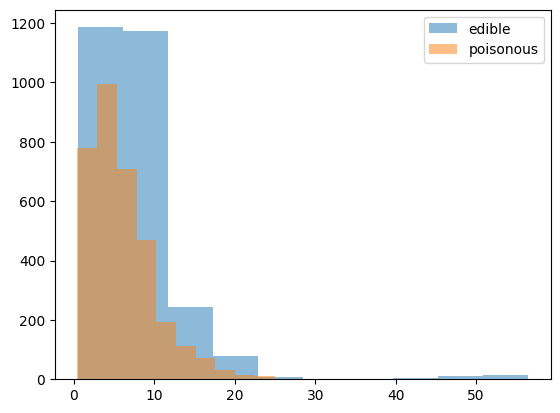

In [48]:
# plot histogram for cap-diameter of both edible and poisonous mushrooms
plt.hist(sample_edible_cap_diameter, bins=10, alpha=0.5, label='edible')
plt.hist(sample_poisonous_cap_diameter, bins=10, alpha=0.5, label='poisonous')
plt.legend(loc='upper right')
plt.show()


In [52]:
poisonous_cap_diameter.describe()

count    33888.000000
mean         5.879763
std          3.966391
min          0.380000
25%          3.040000
50%          4.980000
75%          7.850000
max         30.340000
Name: cap-diameter, dtype: float64

In [75]:
sample_edible_cap_diameter.mean(), sample_edible_cap_diameter.var(), sample_poisonous_cap_diameter.mean(), sample_poisonous_cap_diameter.var()

(7.748204562178073, 37.15233251316283, 5.959613455296549, 16.444483055970025)

In [76]:
sample_edible_cap_diameter.max(), sample_edible_cap_diameter.min(), sample_poisonous_cap_diameter.max(), sample_poisonous_cap_diameter.min()

(56.48, 0.57, 24.96, 0.44)

<Axes: xlabel='class', ylabel='cap-diameter'>

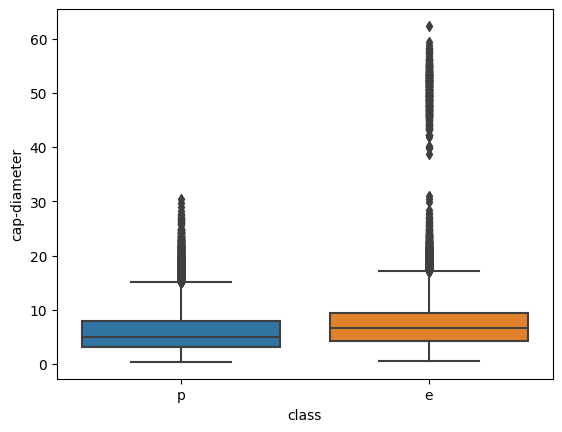

In [79]:
sns.boxplot(x='class', y='cap-diameter', data=df)

In [82]:
#claim: mean of 2 population are equal
#null hypothesis: mu1 = mu2
#alternate hypothesis: mu1 != mu2


# write t-test for cap-diameter of edible and poisonous mushrooms
t_stat, p_value = ttest_ind(sample_edible_cap_diameter, sample_poisonous_cap_diameter, equal_var=False)

alpha = 0.05

print("t_stat: ", t_stat)
print("p_value: ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")


t_stat:  13.142416975252187
p_value:  9.545987651262349e-39
Reject Null Hypothesis


In [92]:
t_critical = t.ppf(1-alpha/2, df=sample_edible_cap_diameter.shape[0]+sample_poisonous_cap_diameter.shape[0]-2)
print("t_critical: ", t_critical)

t_critical:  1.96035263869642


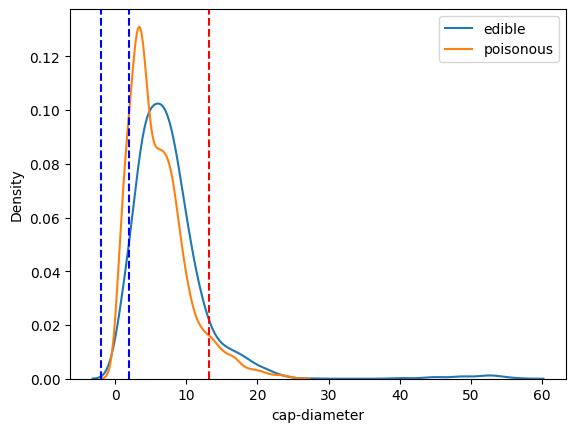

In [97]:
#  plot distribution plot for cap-diameter of edible and poisonous mushrooms
sns.kdeplot(sample_edible_cap_diameter, label='edible')
sns.kdeplot(sample_poisonous_cap_diameter, label='poisonous')
plt.axvline(x=t_stat, color='r', linestyle='--')
plt.axvline(x=t_critical, color='b', linestyle='--')
plt.axvline(x=-t_critical, color='b', linestyle='--')
plt.legend(loc='upper right')
plt.show()

In [69]:
#claim : our mean cap diameter of edible mushrooms is atmost 6 cm i.e. right tailed test
# Ho: mu <= 6
# Ha: mu > 6
# tstat = (xbar - mu)/(s/root(n))
# dof = n-1


hypothesized_mean = 6.0  # Replace with your hypothesized mean

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sample_edible_cap_diameter, hypothesized_mean, alternative='less')

# Define significance level (alpha)
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The cap diameter of poisonous mushrooms is significantly different from the hypothesized mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in cap diameter of poisonous mushrooms from the hypothesized mean.")


T-statistic: 14.95284849372509
P-value: 1.0
Fail to reject the null hypothesis: There is no significant difference in cap diameter of poisonous mushrooms from the hypothesized mean.


In [100]:
#tstat value for given alpha and degree of freedom for right tailed test
t_critical = t.ppf(1-alpha, df=sample_edible_cap_diameter.shape[0]-1)
t_critical

1.645414647190973

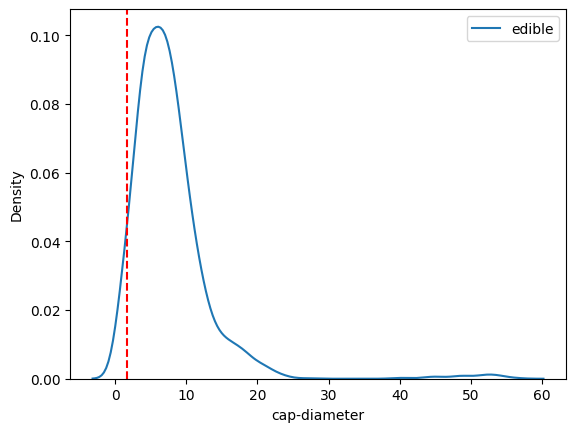

In [103]:
# plot distribution plot for cap-diameter of edible one sample with tstat value and shade the area under curve
sns.kdeplot(sample_edible_cap_diameter, label='edible')
plt.axvline(x=t_critical, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.show()

In [3]:
!git push

To https://github.com/arnav10goel/CSE558-DSc-Project
   9d30f46..6acf237  main -> main
